In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = sns.load_dataset("titanic")


In [3]:
print(df.head())


   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [4]:
print(df.describe(include='all'))

          survived      pclass   sex         age       sibsp       parch  \
count   891.000000  891.000000   891  714.000000  891.000000  891.000000   
unique         NaN         NaN     2         NaN         NaN         NaN   
top            NaN         NaN  male         NaN         NaN         NaN   
freq           NaN         NaN   577         NaN         NaN         NaN   
mean      0.383838    2.308642   NaN   29.699118    0.523008    0.381594   
std       0.486592    0.836071   NaN   14.526497    1.102743    0.806057   
min       0.000000    1.000000   NaN    0.420000    0.000000    0.000000   
25%       0.000000    2.000000   NaN   20.125000    0.000000    0.000000   
50%       0.000000    3.000000   NaN   28.000000    0.000000    0.000000   
75%       1.000000    3.000000   NaN   38.000000    1.000000    0.000000   
max       1.000000    3.000000   NaN   80.000000    8.000000    6.000000   

              fare embarked  class  who adult_male deck  embark_town alive  \
count   8

In [5]:
missing = df.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing)


Missing Values:
 deck           688
age            177
embarked         2
embark_town      2
sex              0
pclass           0
survived         0
fare             0
parch            0
sibsp            0
class            0
adult_male       0
who              0
alive            0
alone            0
dtype: int64


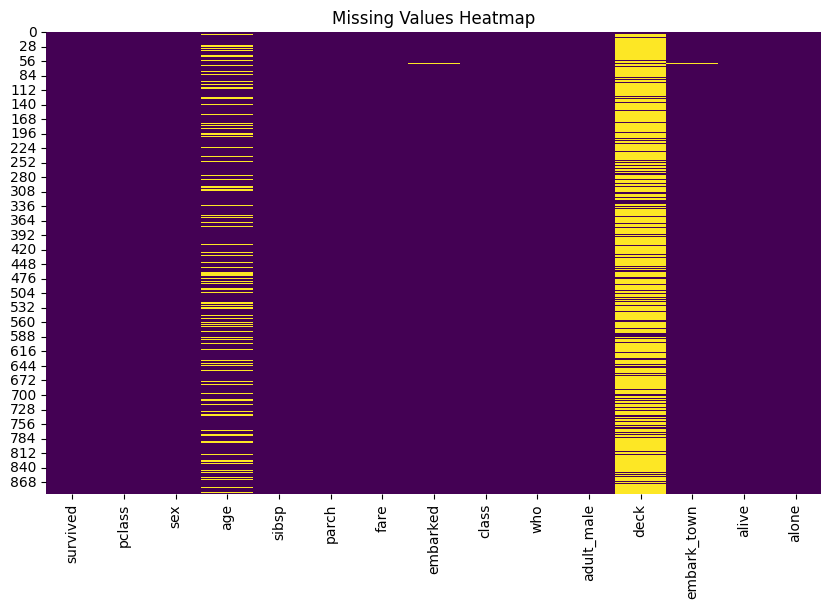

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

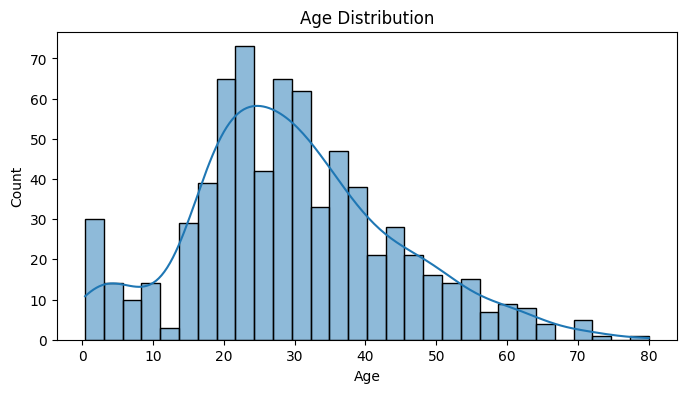

In [7]:
plt.figure(figsize=(8, 4))
sns.histplot(df['age'].dropna(), kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()

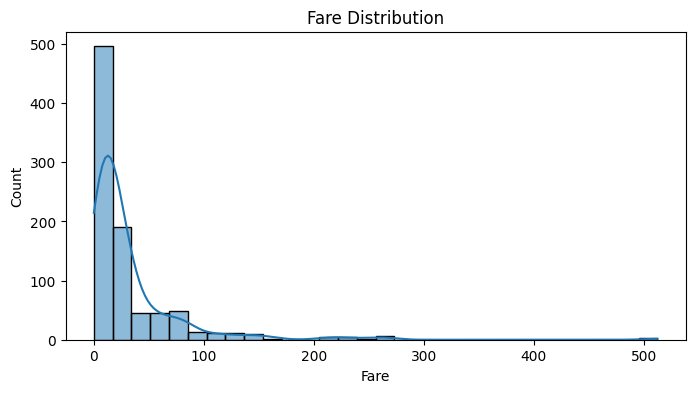

In [8]:
plt.figure(figsize=(8, 4))
sns.histplot(df['fare'], kde=True, bins=30)
plt.title('Fare Distribution')
plt.xlabel('Fare')
plt.show()

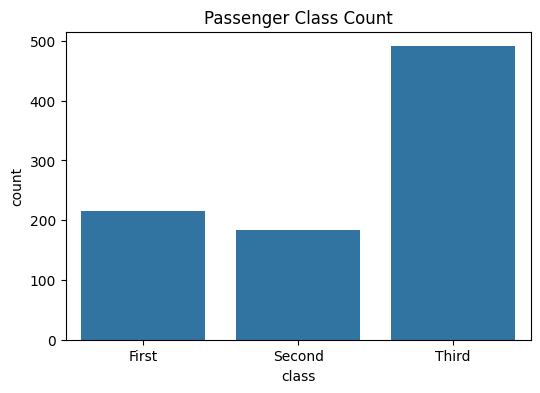

In [9]:
plt.figure(figsize=(6, 4))
sns.countplot(x='class', data=df)
plt.title("Passenger Class Count")
plt.show()

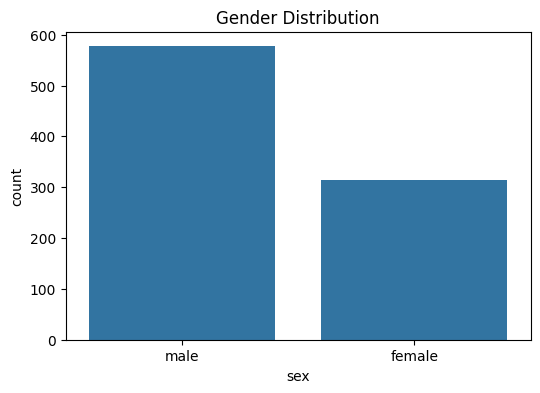

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df)
plt.title("Gender Distribution")
plt.show()

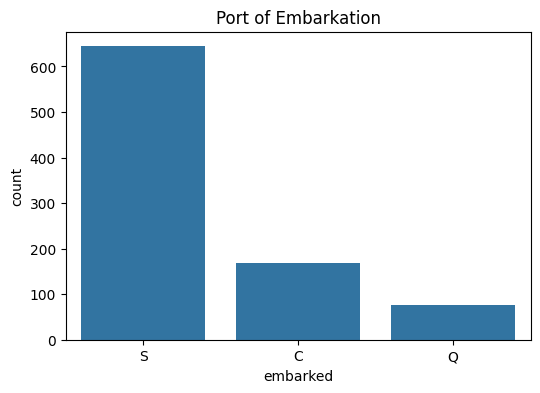

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(x='embarked', data=df)
plt.title("Port of Embarkation")
plt.show()

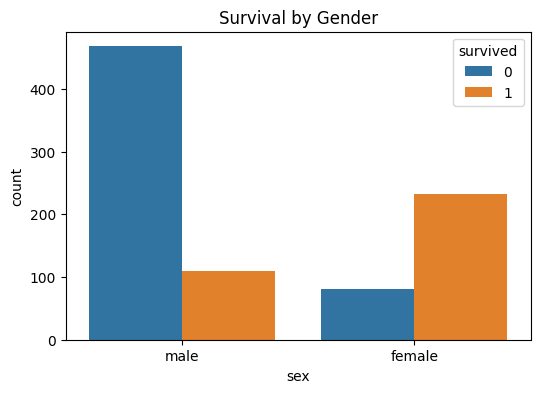

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='survived', data=df)
plt.title("Survival by Gender")
plt.show()


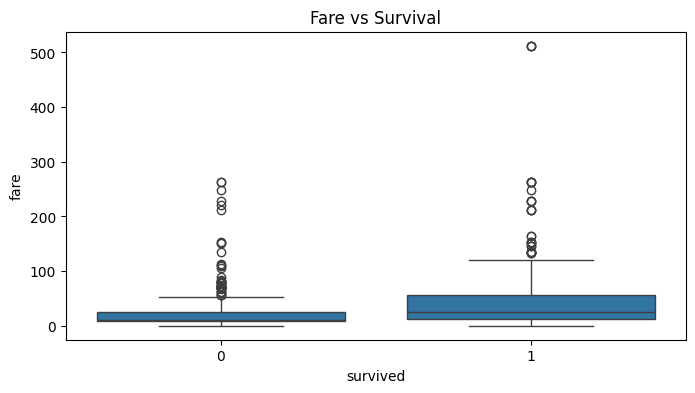

In [13]:
plt.figure(figsize=(8, 4))
sns.boxplot(x='survived', y='fare', data=df)
plt.title("Fare vs Survival")
plt.show()


/tmp/ipython-input-14-2896776305.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['survived'] == 1]['age'].dropna(), label='Survived', shade=True)
/tmp/ipython-input-14-2896776305.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['survived'] == 0]['age'].dropna(), label='Did Not Survive', shade=True)


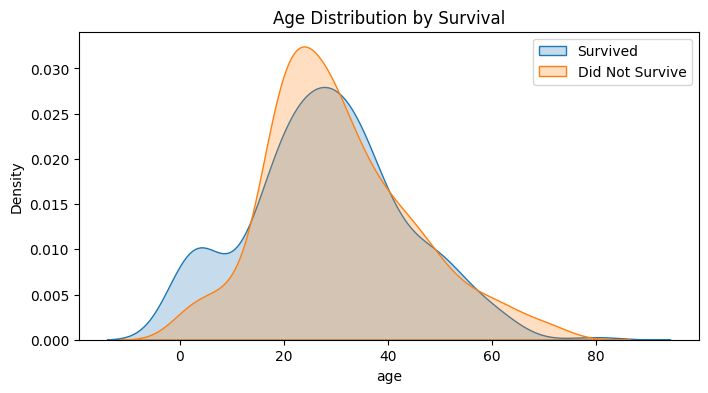

In [14]:
plt.figure(figsize=(8, 4))
sns.kdeplot(df[df['survived'] == 1]['age'].dropna(), label='Survived', shade=True)
sns.kdeplot(df[df['survived'] == 0]['age'].dropna(), label='Did Not Survive', shade=True)
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()


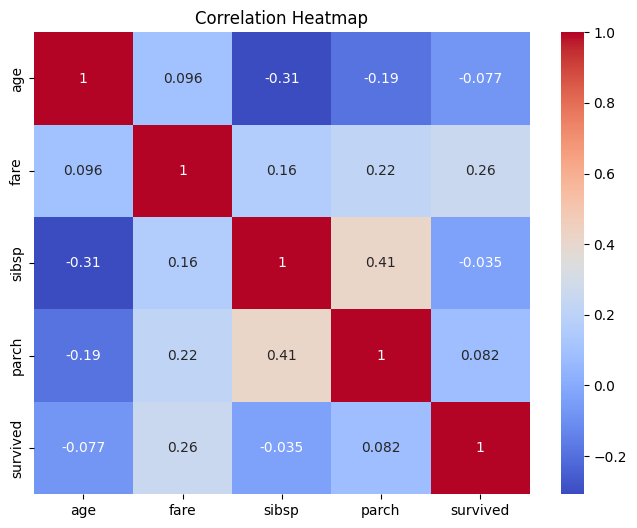

In [15]:
numeric_cols = ['age', 'fare', 'sibsp', 'parch', 'survived']
plt.figure(figsize=(8, 6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

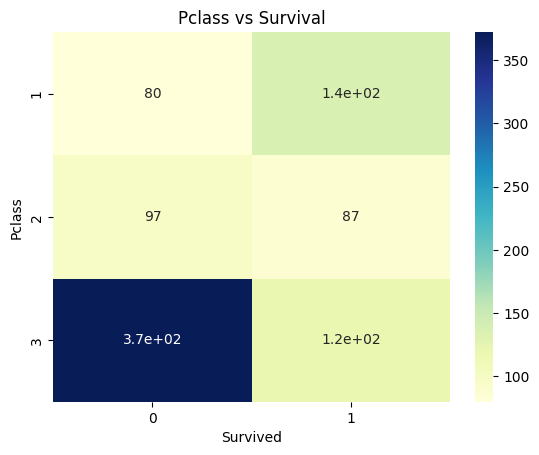

In [16]:
cross_tab = pd.crosstab(df['pclass'], df['survived'])
sns.heatmap(cross_tab, annot=True, cmap='YlGnBu')
plt.title("Pclass vs Survival")
plt.xlabel("Survived")
plt.ylabel("Pclass")
plt.show()